In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [39]:
df = pd.read_excel("casos_confirmados.xlsx")

In [40]:
df

,Município,Mesorregião,Casos Confirmados
0,Belo Horizonte,Metropolitana de Belo Horizonte,275
1,Mantena,Vale do Rio Doce,247
2,Dom Silvério,Zona da Mata,219
3,Teófilo Otoni,Vale do Mucuri,192
4,Paulistas,Vale do Rio Doce,180
...,...,...,...
848,Vespasiano,Metropolitana de Belo Horizonte,0
849,Virgem da Lapa,Jequitinhonha,0
850,Virgínia,Sul/Sudoeste de Minas,0
851,Volta Grande,Zona da Mata,0


In [4]:
#df['Porcentagem_cidades'] = df['Casos confirmados']/(df['Casos confirmados'].sum())*100

In [41]:
df

,Município,Mesorregião,Casos Confirmados
0,Belo Horizonte,Metropolitana de Belo Horizonte,275
1,Mantena,Vale do Rio Doce,247
2,Dom Silvério,Zona da Mata,219
3,Teófilo Otoni,Vale do Mucuri,192
4,Paulistas,Vale do Rio Doce,180
...,...,...,...
848,Vespasiano,Metropolitana de Belo Horizonte,0
849,Virgem da Lapa,Jequitinhonha,0
850,Virgínia,Sul/Sudoeste de Minas,0
851,Volta Grande,Zona da Mata,0


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [7]:
# Carregar o shapefile do mapa de Minas Gerais
shapefile_path = "MG_Municipios_2022\MG_Municipios_2022.shp"
mg_map = gpd.read_file(shapefile_path)

In [8]:
# Carregar o shapefile do mapa de Minas Gerais
shapefile_path2 = "MG_Mesorregioes_2022\MG_Mesorregioes_2022.shp"
mg_map_regiao = gpd.read_file(shapefile_path2)

In [42]:
#deixando nome das colunas iguais
df.rename(columns={'Município': 'NM_MUN'}, inplace=True)


In [10]:
#deixando nome das colunas iguais
df.rename(columns={'Mesorregião': 'NM_MESO'}, inplace=True)

In [44]:
# Realizar a junção usando a coluna do código do município
mg_map = mg_map.merge(df, on='NM_MUN', how='left')


In [12]:
mg_map_regiao = mg_map_regiao.merge(df, on='NM_MESO', how='left')

In [47]:
mg_map[mg_map['NM_MUN'] == 'Belo Horizonte']

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,NM_MESO,Casos confirmados,Mesorregião,Casos Confirmados
65,3106200,Belo Horizonte,MG,331.354,"POLYGON ((-43.86960 -19.92388, -43.86960 -19.9...",Metropolitana de Belo Horizonte,39,Metropolitana de Belo Horizonte,275


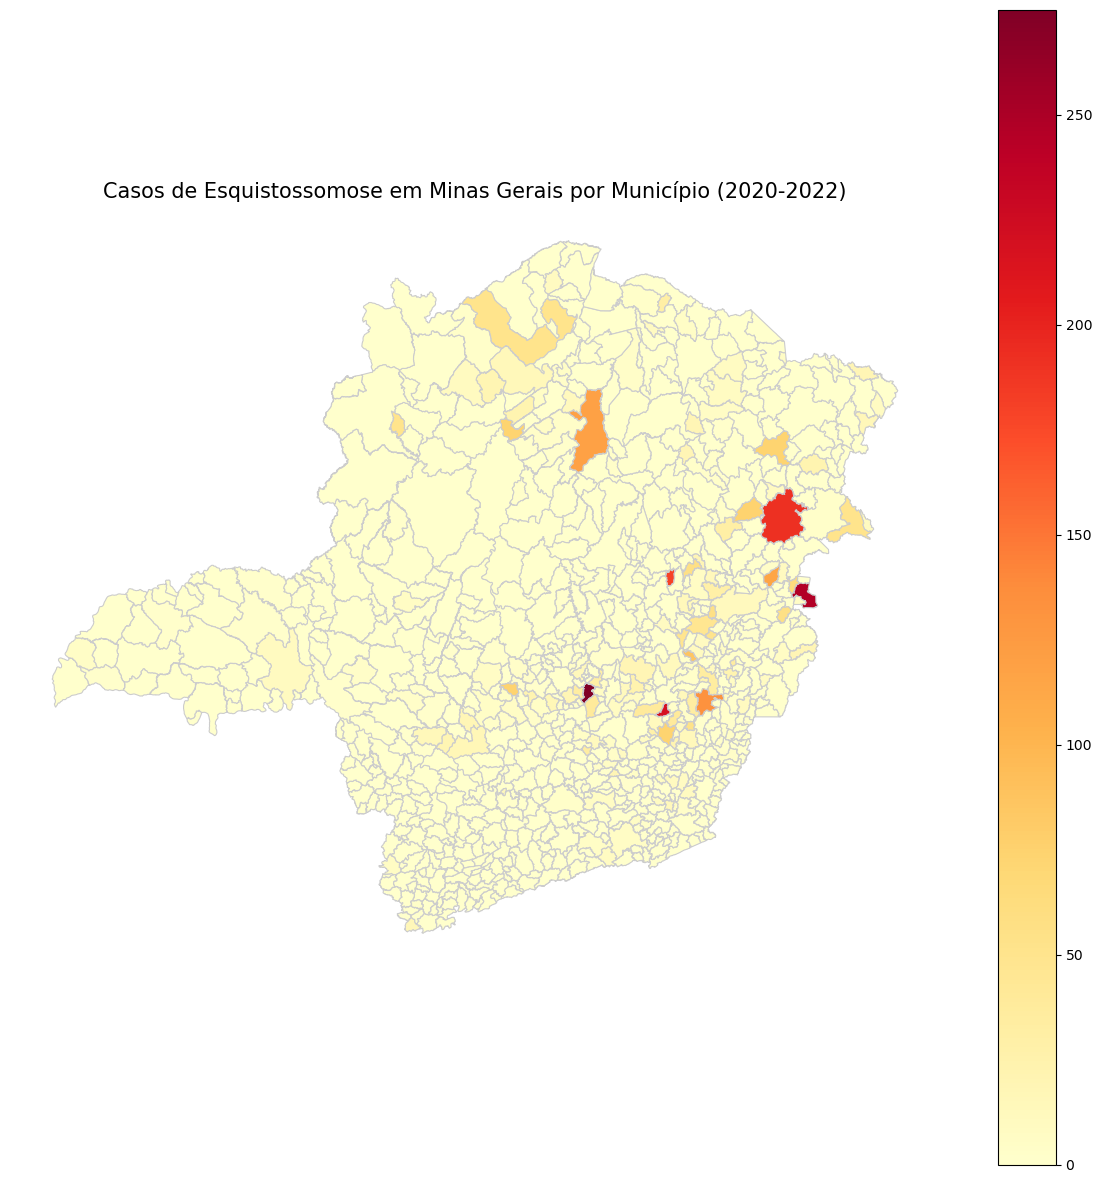

In [48]:
# Definir a coluna de porcentagem para plotar
column_to_plot = 'Casos Confirmados'

# Configurar a figura e o eixo
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plotar o mapa
mg_map.plot(column='Casos Confirmados', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Adicionar título e rótulos
ax.set_title('Casos de Esquistossomose em Minas Gerais por Município (2020-2022)', fontdict={'fontsize': '15', 'fontweight' : '3'})
ax.set_axis_off()

# Mostrar o gráfico
plt.show()

In [19]:
df

,NM_MUN,NM_MESO,Casos confirmados
0,Abadia dos Dourados,Triângulo Mineiro/Alto Paranaíba,0
1,Abaeté,Central Mineira,0
2,Abre Campo,Zona da Mata,0
3,Acaiaca,Zona da Mata,24
4,Açucena,Vale do Rio Doce,46
...,...,...,...
848,Virginópolis,Vale do Rio Doce,6
849,Virgolândia,Vale do Rio Doce,7
850,Visconde do Rio Branco,Zona da Mata,7
851,Volta Grande,Zona da Mata,0


In [21]:
# Agrupamento por região e soma dos casos confirmados
casos_por_regiao = df.groupby("NM_MESO")["Casos confirmados"].sum()

# Exibição dos resultados
print("Casos confirmados por região:")
print(casos_por_regiao)

Casos confirmados por região:
NM_MESO
Campo das Vertentes                  41
Central Mineira                      37
Jequitinhonha                        66
Metropolitana de Belo Horizonte     459
Noroeste de Minas                    51
Norte de Minas                      315
Oeste de Minas                       96
Sul/Sudoeste de Minas                34
Triângulo Mineiro/Alto Paranaíba     58
Vale do Mucuri                      573
Vale do Rio Doce                    468
Zona da Mata                        895
Name: Casos confirmados, dtype: int64


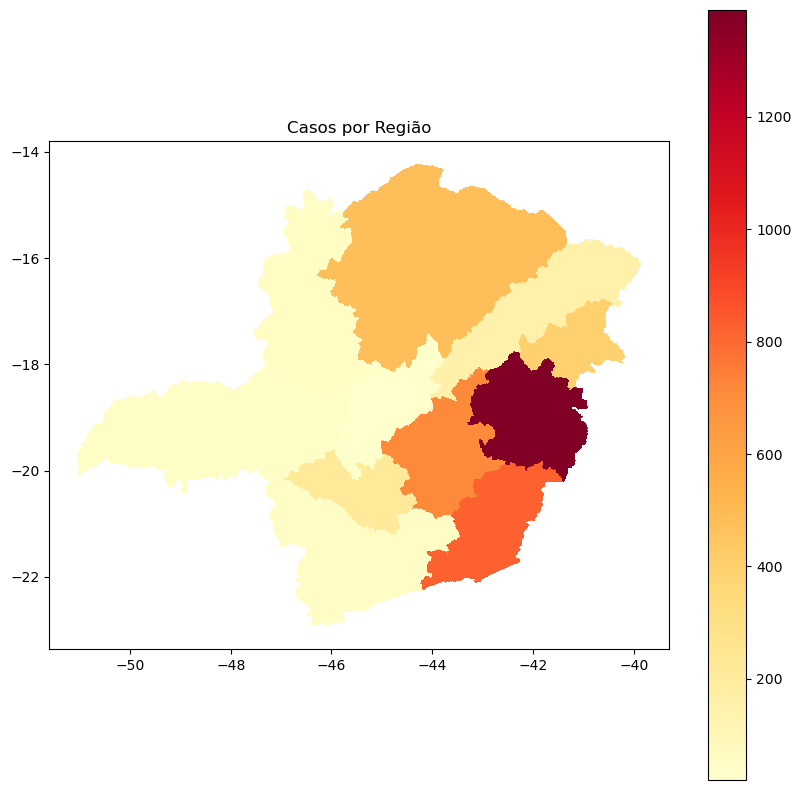

In [27]:
# Carregue os dados da porcentagem de depressão (substitua pelos seus dados reais)
casos_mg = {
    "Noroeste de Minas": 57,
    "Norte de Minas": 482,
    "Jequitinhonha": 157,
    "Vale do Mucuri": 397,
    "Triângulo Mineiro/Alto Paranaíba": 45,
    "Central Mineira": 20,
    "Metropolitana de Belo Horizonte": 714,
    "Vale do Rio Doce": 1390,
    "Oeste de Minas": 221,
    "Sul/Sudoeste de Minas": 47,
    "Campo das Vertentes": 49,
    "Zona da Mata": 823
}

# Junte os dados
mg_map_regiao['Casos_totais'] = mg_map_regiao['NM_MESO'].map(casos_mg)

# Plote o mapa
fig, ax = plt.subplots(figsize=(10, 10))
mg_map_regiao.plot(column='Casos_totais', cmap='YlOrRd', legend=True, ax=ax)
plt.title('Casos por Região')
plt.show()
